In [1]:
import numpy as np

In [2]:
import zipfile

with zipfile.ZipFile('../artifacts/sentiment-analysis-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('../artifacts/')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv('../artifacts/sentiment_analysis.csv')

In [5]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
#DATA PREPROCCESSING

data.shape

(7920, 3)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [9]:
#TEXT PREPROCCESSING

import re
import string

In [10]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(word.lower() for word in x.split()))


In [12]:
data["tweet"].head(6)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
Name: tweet, dtype: object

In [13]:
data["tweet"] = data["tweet"].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))

In [14]:
data["tweet"].head(6)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
Name: tweet, dtype: object

In [15]:
 #REMOVE PUNCHUATIONS

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text

data["tweet"]=data["tweet"].apply(remove_punctuations)

In [16]:
data["tweet"].head(6)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
Name: tweet, dtype: object

In [17]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [18]:
# Remove numbers from the tweet column

data["tweet"] = data["tweet"].apply(lambda x: re.sub(r'\d+', '', x))


In [19]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [20]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
#remove stopwords

import nltk

In [21]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [23]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [25]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [26]:
#STEMMING

from nltk.stem import PorterStemmer
ps=PorterStemmer()



In [27]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split())) 

In [28]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [29]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [30]:
#BUILDING VOCABULARY

from collections import Counter

vocab=Counter()

In [31]:
#hadaya
vocab.update(['java','python','c#','c++'])

In [32]:
vocab


Counter({'java': 1, 'python': 1, 'c#': 1, 'c++': 1})

In [33]:
vocab.clear()

In [34]:
vocab


Counter()

In [35]:
#getting sentence

for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [36]:
vocab


Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 456,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 383,
         'io': 383,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 277,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [132]:
#EMMIT FEATURES IN LOW RELATIONS

tokens=[key for key in vocab if vocab[key]>10]

In [133]:
#NOW OUR VOCAB IS TOKENS
len(tokens)

1146

In [134]:
#SAVING TOKENS TO VOCABULARY.TXT

def save_vocabulary(lines, filename):
    data='\n'.join(lines)
    file=open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')

In [135]:
#SEPERATE DATASET TO TESTING AND TRAINING 

x=data['tweet']
y=data['label']

In [136]:
x


0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [137]:
#devides data set to train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [138]:
x_train.shape

(6336,)

In [139]:
x_train


5538    ad luxuri aurora gra collect product check … i...
5566    let show coresystem germani coresuit cloud iph...
172     holi shitbird watch last night colbertreport a...
1651    first iphon iphon plu birthday steve job birth...
1763    iphoneplu love batteri beoooooti never run qua...
                              ...                        
3096    good morn happi peopl bagi pin donk v android ...
7764    got new ps replac die one thrifter excit fun d...
97      see mani featur didnt know iphon iphon yourtec...
112     get tast frank ocean’ new… news photographi fa...
1213    life mother mother iphon iphon iphon strength ...
Name: tweet, Length: 6336, dtype: object

In [140]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        # Split the sentence into words
        sentence_words = sentence.split()
        
        # Loop through the vocabulary to check presence of words in the sentence
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence_words:
                sentence_lst[i] = 1
        
        vectorized_lst.append(sentence_lst)
    
    # Convert the list to a NumPy array of type float32
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new


In [141]:
vectorized_x_train=vectorizer(x_train, tokens)

In [142]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [143]:

vectorized_x_test=vectorizer(x_test, tokens)

In [144]:
y_train

5538    0
5566    0
172     1
1651    0
1763    0
       ..
3096    0
7764    0
97      0
112     0
1213    0
Name: label, Length: 6336, dtype: int64

In [145]:
y_train.value_counts()

label
0    4727
1    1609
Name: count, dtype: int64

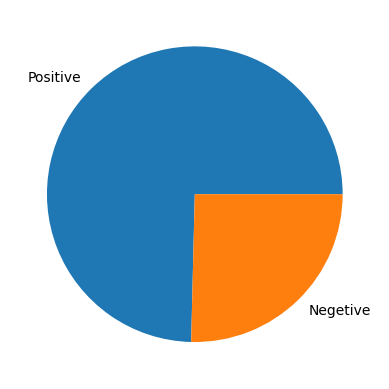

In [146]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negetive'])
plt.show()

In [147]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [148]:
#handle imbalanced dataset

from imblearn.over_sampling import SMOTE

smote=SMOTE()
vectorized_x_train_smote, y_train_smote=smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote,y_train_smote.shape)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.2515152 0.2515152 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]] (9454,)


In [149]:
vectorized_x_train_smote.shape

(9454, 1146)

In [150]:
y_train_smote.shape

(9454,)

In [151]:
y_train_smote.value_counts()

label
0    4727
1    4727
Name: count, dtype: int64

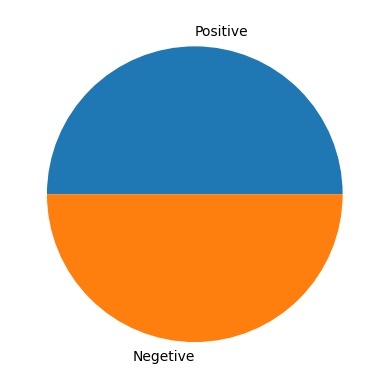

In [152]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['Positive','Negetive'])
plt.show()

In [153]:
#MODEL TRAINING AND EVOLUATION

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [154]:
#evaluation of the model functions

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#use actual values and predicted values

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr  = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1  = round(f1_score(y_act, y_pred), 3)
    print(
        f"Training Scores:\n"
        f"\tAccuracy: {acc}\n"
        f"\tPrecision: {pr}\n"
        f"\tRecall: {rec}\n"
        f"\tF1-Score: {f1}"
    )

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr  = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1  = round(f1_score(y_act, y_pred), 3)
    print(
        f"Validation Scores:\n"
        f"\tAccuracy: {acc}\n"
        f"\tPrecision: {pr}\n"
        f"\tRecall: {rec}\n"
        f"\tF1-Score: {f1}"
    )


In [163]:
#logistic regression

lr=LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=lr.predict(vectorized_x_train_smote)\
#get testing accuracy
y_test_pred=lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy: 0.941
	Precision: 0.916
	Recall: 0.97
	F1-Score: 0.942
Validation Scores:
	Accuracy: 0.872
	Precision: 0.723
	Recall: 0.835
	F1-Score: 0.775


In [164]:
#MultinominalNB

mnb=MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=mnb.predict(vectorized_x_train_smote)\
#get testing accuracy
y_test_pred=mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy: 0.902
	Precision: 0.866
	Recall: 0.951
	F1-Score: 0.906
Validation Scores:
	Accuracy: 0.871
	Precision: 0.694
	Recall: 0.909
	F1-Score: 0.787


In [165]:
#DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=dtc.predict(vectorized_x_train_smote)\
#get testing accuracy
y_test_pred=dtc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy: 1.0
	Precision: 1.0
	Recall: 0.999
	F1-Score: 1.0
Validation Scores:
	Accuracy: 0.838
	Precision: 0.705
	Recall: 0.664
	F1-Score: 0.684


In [166]:
#RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=rfc.predict(vectorized_x_train_smote)\
#get testing accuracy
y_test_pred=rfc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy: 1.0
	Precision: 0.999
	Recall: 1.0
	F1-Score: 1.0
Validation Scores:
	Accuracy: 0.868
	Precision: 0.783
	Recall: 0.691
	F1-Score: 0.734


In [167]:
#SVC

svc=SVC()
svc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred=svc.predict(vectorized_x_train_smote)\
#get testing accuracy
y_test_pred=svc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy: 0.978
	Precision: 0.961
	Recall: 0.996
	F1-Score: 0.978
Validation Scores:
	Accuracy: 0.879
	Precision: 0.754
	Recall: 0.801
	F1-Score: 0.777


In [169]:
#save model using pikle files/joblip

import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr, file)

